## Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import matplotlib.image as imread

import PIL


In [2]:
df_dicom = pd.read_csv('./Data/csv/dicom_info.csv')
df_dicom.head()

,file_path,image_path,AccessionNumber,BitsAllocated,BitsStored,BodyPartExamined,Columns,ContentDate,ContentTime,ConversionType,...,SecondaryCaptureDeviceManufacturerModelName,SeriesDescription,SeriesInstanceUID,SeriesNumber,SmallestImagePixelValue,SpecificCharacterSet,StudyDate,StudyID,StudyInstanceUID,StudyTime
0,CBIS-DDSM/dicom/1.3.6.1.4.1.9590.100.1.2.12930...,CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.129308...,NaN,16,16,BREAST,351,20160426,131732.685,WSD,...,MATLAB,cropped images,1.3.6.1.4.1.9590.100.1.2.129308726812851964007...,1,23078,ISO_IR 100,20160720.0,DDSM,1.3.6.1.4.1.9590.100.1.2.271867287611061855725...,214951.0
1,CBIS-DDSM/dicom/1.3.6.1.4.1.9590.100.1.2.24838...,CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.248386...,NaN,16,16,BREAST,3526,20160426,143829.101,WSD,...,MATLAB,full mammogram images,1.3.6.1.4.1.9590.100.1.2.248386742010678582309...,1,0,ISO_IR 100,20160720.0,DDSM,1.3.6.1.4.1.9590.100.1.2.161516517311681906612...,193426.0
2,CBIS-DDSM/dicom/1.3.6.1.4.1.9590.100.1.2.26721...,CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.267213...,NaN,16,16,BREAST,1546,20160503,111956.298,WSD,...,MATLAB,full mammogram images,1.3.6.1.4.1.9590.100.1.2.267213171011171858918...,1,0,ISO_IR 100,20160807.0,DDSM,1.3.6.1.4.1.9590.100.1.2.291043622711253836701...,161814.0
3,CBIS-DDSM/dicom/1.3.6.1.4.1.9590.100.1.2.38118...,CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.381187...,NaN,16,16,BREAST,97,20160503,115347.770,WSD,...,MATLAB,cropped images,1.3.6.1.4.1.9590.100.1.2.381187369611524586537...,1,32298,ISO_IR 100,20170829.0,DDSM,1.3.6.1.4.1.9590.100.1.2.335006093711888937440...,180109.0
4,CBIS-DDSM/dicom/1.3.6.1.4.1.9590.100.1.2.38118...,CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.381187...,NaN,8,8,Left Breast,3104,20160503,115347.770,WSD,...,MATLAB,NaN,1.3.6.1.4.1.9590.100.1.2.381187369611524586537...,1,0,ISO_IR 100,NaN,DDSM,1.3.6.1.4.1.9590.100.1.2.335006093711888937440...,NaN


In [3]:
df_dicom.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10237 entries, 0 to 10236
Data columns (total 38 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   file_path                                    10237 non-null  object 
 1   image_path                                   10237 non-null  object 
 2   AccessionNumber                              0 non-null      float64
 3   BitsAllocated                                10237 non-null  int64  
 4   BitsStored                                   10237 non-null  int64  
 5   BodyPartExamined                             10237 non-null  object 
 6   Columns                                      10237 non-null  int64  
 7   ContentDate                                  10237 non-null  int64  
 8   ContentTime                                  10237 non-null  float64
 9   ConversionType                               10237 non-null  object 
 10

In [4]:
df_dicom.SeriesDescription.unique()

array(['cropped images', 'full mammogram images', nan, 'ROI mask images'],
      dtype=object)

### Creating Hashmaps for full images, cropped images and ROI masks images

In [5]:
cropped_images = df_dicom[df_dicom['SeriesDescription']=='cropped images'].image_path
cropped_images.head()

0     CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.129308...
3     CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.381187...
6     CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.153339...
7     CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.178994...
10    CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.411833...
Name: image_path, dtype: object

In [6]:
image_dir = './Data/jpeg'

In [7]:
cropped_images = cropped_images.apply(lambda x: x.replace('CBIS-DDSM/jpeg',image_dir))
cropped_images.head()

0     ./Data/jpeg/1.3.6.1.4.1.9590.100.1.2.129308726...
3     ./Data/jpeg/1.3.6.1.4.1.9590.100.1.2.381187369...
6     ./Data/jpeg/1.3.6.1.4.1.9590.100.1.2.153339052...
7     ./Data/jpeg/1.3.6.1.4.1.9590.100.1.2.178994714...
10    ./Data/jpeg/1.3.6.1.4.1.9590.100.1.2.411833492...
Name: image_path, dtype: object

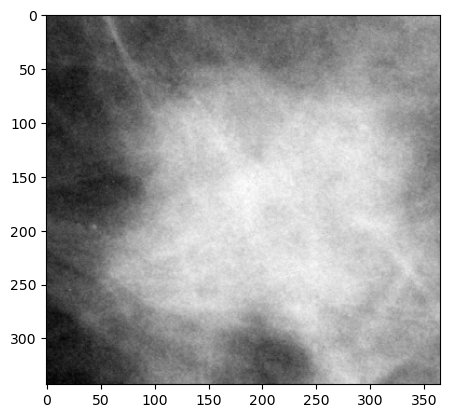

In [8]:
for file in cropped_images[0:6]:
    cropped_images_show = PIL.Image.open(file) # open image
    grey_image = cropped_images_show.convert('L')
    plt.imshow(grey_image, cmap='gray')

In [9]:
full_images = df_dicom[df_dicom['SeriesDescription']=='full mammogram images'].image_path
full_images = full_images.apply(lambda x: x.replace('CBIS-DDSM/jpeg',image_dir))
full_images.head()

1     ./Data/jpeg/1.3.6.1.4.1.9590.100.1.2.248386742...
2     ./Data/jpeg/1.3.6.1.4.1.9590.100.1.2.267213171...
11    ./Data/jpeg/1.3.6.1.4.1.9590.100.1.2.210396893...
12    ./Data/jpeg/1.3.6.1.4.1.9590.100.1.2.749566583...
15    ./Data/jpeg/1.3.6.1.4.1.9590.100.1.2.987658854...
Name: image_path, dtype: object

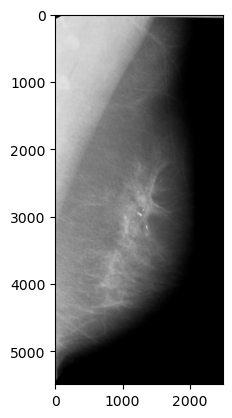

In [10]:
for file in full_images[0:3]:
    full_images_show = PIL.Image.open(file) # open image
    grey_image = full_images_show.convert('L')
    plt.imshow(grey_image, cmap='gray')

In [11]:
roi_images = df_dicom[df_dicom['SeriesDescription']=='ROI mask images'].image_path
roi_images = roi_images.apply(lambda x: x.replace('CBIS-DDSM/jpeg',image_dir))
roi_images.head()

5     ./Data/jpeg/1.3.6.1.4.1.9590.100.1.2.153339052...
8     ./Data/jpeg/1.3.6.1.4.1.9590.100.1.2.178994714...
9     ./Data/jpeg/1.3.6.1.4.1.9590.100.1.2.411833492...
14    ./Data/jpeg/1.3.6.1.4.1.9590.100.1.2.236373548...
20    ./Data/jpeg/1.3.6.1.4.1.9590.100.1.2.357008050...
Name: image_path, dtype: object

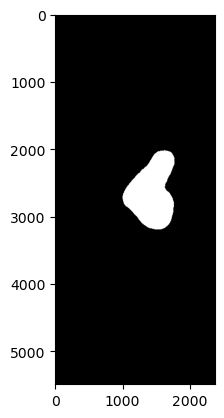

In [12]:
for file in roi_images[0:3]:
    roi_images_show = PIL.Image.open(file) # open image
    grey_image = roi_images_show.convert('L')
    plt.imshow(grey_image, cmap='gray')

Making each image paths as dictionary

In [13]:
full_image_dict = dict()
cropped_image_dict = dict()
roi_image_dict = dict()

for image in full_images:
    key = image.split('/')[3]
    full_image_dict[key] = image
for image in cropped_images:
    key = image.split('/')[3]
    cropped_image_dict[key] = image
for image in roi_images:
    key = image.split('/')[3]
    roi_image_dict[key] = image

In [14]:
# view keys
next(iter((full_image_dict.items())))

('1.3.6.1.4.1.9590.100.1.2.248386742010678582309005372213277814849',
 './Data/jpeg/1.3.6.1.4.1.9590.100.1.2.248386742010678582309005372213277814849/1-249.jpg')

### Training Data - Mass data

In [15]:
train_mass = pd.read_csv('./Data/csv/mass_case_description_train_set.csv')
train_mass.head()

,patient_id,breast_density,left or right breast,image view,abnormality id,abnormality type,mass shape,mass margins,assessment,pathology,subtlety,image file path,cropped image file path,ROI mask file path
0,P_00001,3,LEFT,CC,1,mass,IRREGULAR-ARCHITECTURAL_DISTORTION,SPICULATED,4,MALIGNANT,4,Mass-Training_P_00001_LEFT_CC/1.3.6.1.4.1.9590...,Mass-Training_P_00001_LEFT_CC_1/1.3.6.1.4.1.95...,Mass-Training_P_00001_LEFT_CC_1/1.3.6.1.4.1.95...
1,P_00001,3,LEFT,MLO,1,mass,IRREGULAR-ARCHITECTURAL_DISTORTION,SPICULATED,4,MALIGNANT,4,Mass-Training_P_00001_LEFT_MLO/1.3.6.1.4.1.959...,Mass-Training_P_00001_LEFT_MLO_1/1.3.6.1.4.1.9...,Mass-Training_P_00001_LEFT_MLO_1/1.3.6.1.4.1.9...
2,P_00004,3,LEFT,CC,1,mass,ARCHITECTURAL_DISTORTION,ILL_DEFINED,4,BENIGN,3,Mass-Training_P_00004_LEFT_CC/1.3.6.1.4.1.9590...,Mass-Training_P_00004_LEFT_CC_1/1.3.6.1.4.1.95...,Mass-Training_P_00004_LEFT_CC_1/1.3.6.1.4.1.95...
3,P_00004,3,LEFT,MLO,1,mass,ARCHITECTURAL_DISTORTION,ILL_DEFINED,4,BENIGN,3,Mass-Training_P_00004_LEFT_MLO/1.3.6.1.4.1.959...,Mass-Training_P_00004_LEFT_MLO_1/1.3.6.1.4.1.9...,Mass-Training_P_00004_LEFT_MLO_1/1.3.6.1.4.1.9...
4,P_00004,3,RIGHT,MLO,1,mass,OVAL,CIRCUMSCRIBED,4,BENIGN,5,Mass-Training_P_00004_RIGHT_MLO/1.3.6.1.4.1.95...,Mass-Training_P_00004_RIGHT_MLO_1/1.3.6.1.4.1....,Mass-Training_P_00004_RIGHT_MLO_1/1.3.6.1.4.1....


In [16]:
train_mass.shape

(1318, 14)

In [17]:
train_mass['image file path'].nunique()

1231

In [18]:
# Change column names without space
def column_name_no_space(table_name):
    new_columns = []
    for column in table_name.columns:
        if ' ' in column:
            new_columns.append(column.replace(' ',"_"))
        else:
            new_columns.append(column)
    return new_columns

In [19]:
train_mass.columns = column_name_no_space(train_mass)
train_mass.head()

,patient_id,breast_density,left_or_right_breast,image_view,abnormality_id,abnormality_type,mass_shape,mass_margins,assessment,pathology,subtlety,image_file_path,cropped_image_file_path,ROI_mask_file_path
0,P_00001,3,LEFT,CC,1,mass,IRREGULAR-ARCHITECTURAL_DISTORTION,SPICULATED,4,MALIGNANT,4,Mass-Training_P_00001_LEFT_CC/1.3.6.1.4.1.9590...,Mass-Training_P_00001_LEFT_CC_1/1.3.6.1.4.1.95...,Mass-Training_P_00001_LEFT_CC_1/1.3.6.1.4.1.95...
1,P_00001,3,LEFT,MLO,1,mass,IRREGULAR-ARCHITECTURAL_DISTORTION,SPICULATED,4,MALIGNANT,4,Mass-Training_P_00001_LEFT_MLO/1.3.6.1.4.1.959...,Mass-Training_P_00001_LEFT_MLO_1/1.3.6.1.4.1.9...,Mass-Training_P_00001_LEFT_MLO_1/1.3.6.1.4.1.9...
2,P_00004,3,LEFT,CC,1,mass,ARCHITECTURAL_DISTORTION,ILL_DEFINED,4,BENIGN,3,Mass-Training_P_00004_LEFT_CC/1.3.6.1.4.1.9590...,Mass-Training_P_00004_LEFT_CC_1/1.3.6.1.4.1.95...,Mass-Training_P_00004_LEFT_CC_1/1.3.6.1.4.1.95...
3,P_00004,3,LEFT,MLO,1,mass,ARCHITECTURAL_DISTORTION,ILL_DEFINED,4,BENIGN,3,Mass-Training_P_00004_LEFT_MLO/1.3.6.1.4.1.959...,Mass-Training_P_00004_LEFT_MLO_1/1.3.6.1.4.1.9...,Mass-Training_P_00004_LEFT_MLO_1/1.3.6.1.4.1.9...
4,P_00004,3,RIGHT,MLO,1,mass,OVAL,CIRCUMSCRIBED,4,BENIGN,5,Mass-Training_P_00004_RIGHT_MLO/1.3.6.1.4.1.95...,Mass-Training_P_00004_RIGHT_MLO_1/1.3.6.1.4.1....,Mass-Training_P_00004_RIGHT_MLO_1/1.3.6.1.4.1....


In [20]:
# Fix path columns for train_mass
def fix_img_path(df):
    for index, row in df.iterrows():
        image_name_f = row['image_file_path'].split('/')[2]
        if image_name_f in full_image_dict:
            df.at[index, 'image_file_path'] = full_image_dict[image_name_f]
    
        image_name_c = row['cropped_image_file_path'].split('/')[2]
        if image_name_c in cropped_image_dict:
            df.at[index, 'cropped_image_file_path'] = cropped_image_dict[image_name_c]
    
        image_name_r = row['ROI_mask_file_path'].split('/')[2]
        if image_name_r in roi_image_dict:
            df.at[index, 'ROI_mask_file_path'] = roi_image_dict[image_name_r]



In [21]:
fix_img_path(train_mass)

In [22]:
print(f"'Mass Train shape' {train_mass.shape}\n"
      f"'Unique full image path' {train_mass.image_file_path.nunique()}\n"
      f"'Unique cropped image path' {train_mass.cropped_image_file_path.nunique()}\n"
      f"'Unique ROI mask image path' {train_mass.ROI_mask_file_path.nunique()}")

'Mass Train shape' (1318, 14)
'Unique full image path' 1231
'Unique cropped image path' 1318
'Unique ROI mask image path' 1318


In [23]:
# # Fix image paths
# for path in train_mass.image_file_path:
#     image_name = path.split('/')[2]
#     if image_name in full_image_dict.keys():
#         train_mass.image_file_path = full_image_dict[image_name]

# for path in train_mass.cropped_image_file_path:
#     image_name = path.split('/')[2]
#     if image_name in cropped_image_dict.keys():
#         train_mass.cropped_image_file_path = cropped_image_dict[image_name]

# for path in train_mass.ROI_mask_file_path:
#     image_name = path.split('/')[2]
#     if image_name in roi_image_dict.keys():
#         train_mass.ROI_mask_file_path = roi_image_dict[image_name]

In [24]:
train_mass.head()

,patient_id,breast_density,left_or_right_breast,image_view,abnormality_id,abnormality_type,mass_shape,mass_margins,assessment,pathology,subtlety,image_file_path,cropped_image_file_path,ROI_mask_file_path
0,P_00001,3,LEFT,CC,1,mass,IRREGULAR-ARCHITECTURAL_DISTORTION,SPICULATED,4,MALIGNANT,4,./Data/jpeg/1.3.6.1.4.1.9590.100.1.2.342386194...,./Data/jpeg/1.3.6.1.4.1.9590.100.1.2.296736403...,./Data/jpeg/1.3.6.1.4.1.9590.100.1.2.296736403...
1,P_00001,3,LEFT,MLO,1,mass,IRREGULAR-ARCHITECTURAL_DISTORTION,SPICULATED,4,MALIGNANT,4,./Data/jpeg/1.3.6.1.4.1.9590.100.1.2.359308329...,./Data/jpeg/1.3.6.1.4.1.9590.100.1.2.227955274...,./Data/jpeg/1.3.6.1.4.1.9590.100.1.2.227955274...
2,P_00004,3,LEFT,CC,1,mass,ARCHITECTURAL_DISTORTION,ILL_DEFINED,4,BENIGN,3,./Data/jpeg/1.3.6.1.4.1.9590.100.1.2.891800462...,./Data/jpeg/1.3.6.1.4.1.9590.100.1.2.429120414...,./Data/jpeg/1.3.6.1.4.1.9590.100.1.2.429120414...
3,P_00004,3,LEFT,MLO,1,mass,ARCHITECTURAL_DISTORTION,ILL_DEFINED,4,BENIGN,3,./Data/jpeg/1.3.6.1.4.1.9590.100.1.2.295360926...,./Data/jpeg/1.3.6.1.4.1.9590.100.1.2.115134232...,./Data/jpeg/1.3.6.1.4.1.9590.100.1.2.115134232...
4,P_00004,3,RIGHT,MLO,1,mass,OVAL,CIRCUMSCRIBED,4,BENIGN,5,./Data/jpeg/1.3.6.1.4.1.9590.100.1.2.410524754...,./Data/jpeg/1.3.6.1.4.1.9590.100.1.2.128573663...,./Data/jpeg/1.3.6.1.4.1.9590.100.1.2.128573663...


In [25]:
# Double check if image path is from destinated folder
def path_in_folder(df):
    base_dir = './Data/jpeg/'
    mask = (df['image_file_path'].str.startswith(base_dir)&
           df['cropped_image_file_path'].str.startswith(base_dir)&
           df['ROI_mask_file_path'].str.startswith(base_dir)
    )
    filtered_df = df[mask]
    return filtered_df

In [26]:
train_mass=path_in_folder(train_mass)

In [27]:
train_mass.shape

(1318, 14)

In [28]:
train_mass.head()

,patient_id,breast_density,left_or_right_breast,image_view,abnormality_id,abnormality_type,mass_shape,mass_margins,assessment,pathology,subtlety,image_file_path,cropped_image_file_path,ROI_mask_file_path
0,P_00001,3,LEFT,CC,1,mass,IRREGULAR-ARCHITECTURAL_DISTORTION,SPICULATED,4,MALIGNANT,4,./Data/jpeg/1.3.6.1.4.1.9590.100.1.2.342386194...,./Data/jpeg/1.3.6.1.4.1.9590.100.1.2.296736403...,./Data/jpeg/1.3.6.1.4.1.9590.100.1.2.296736403...
1,P_00001,3,LEFT,MLO,1,mass,IRREGULAR-ARCHITECTURAL_DISTORTION,SPICULATED,4,MALIGNANT,4,./Data/jpeg/1.3.6.1.4.1.9590.100.1.2.359308329...,./Data/jpeg/1.3.6.1.4.1.9590.100.1.2.227955274...,./Data/jpeg/1.3.6.1.4.1.9590.100.1.2.227955274...
2,P_00004,3,LEFT,CC,1,mass,ARCHITECTURAL_DISTORTION,ILL_DEFINED,4,BENIGN,3,./Data/jpeg/1.3.6.1.4.1.9590.100.1.2.891800462...,./Data/jpeg/1.3.6.1.4.1.9590.100.1.2.429120414...,./Data/jpeg/1.3.6.1.4.1.9590.100.1.2.429120414...
3,P_00004,3,LEFT,MLO,1,mass,ARCHITECTURAL_DISTORTION,ILL_DEFINED,4,BENIGN,3,./Data/jpeg/1.3.6.1.4.1.9590.100.1.2.295360926...,./Data/jpeg/1.3.6.1.4.1.9590.100.1.2.115134232...,./Data/jpeg/1.3.6.1.4.1.9590.100.1.2.115134232...
4,P_00004,3,RIGHT,MLO,1,mass,OVAL,CIRCUMSCRIBED,4,BENIGN,5,./Data/jpeg/1.3.6.1.4.1.9590.100.1.2.410524754...,./Data/jpeg/1.3.6.1.4.1.9590.100.1.2.128573663...,./Data/jpeg/1.3.6.1.4.1.9590.100.1.2.128573663...


### Training Data - Calcification Data

In [29]:
train_calc = pd.read_csv('./Data/csv/calc_case_description_train_set.csv')
train_calc.head()

,patient_id,breast density,left or right breast,image view,abnormality id,abnormality type,calc type,calc distribution,assessment,pathology,subtlety,image file path,cropped image file path,ROI mask file path
0,P_00005,3,RIGHT,CC,1,calcification,AMORPHOUS,CLUSTERED,3,MALIGNANT,3,Calc-Training_P_00005_RIGHT_CC/1.3.6.1.4.1.959...,Calc-Training_P_00005_RIGHT_CC_1/1.3.6.1.4.1.9...,Calc-Training_P_00005_RIGHT_CC_1/1.3.6.1.4.1.9...
1,P_00005,3,RIGHT,MLO,1,calcification,AMORPHOUS,CLUSTERED,3,MALIGNANT,3,Calc-Training_P_00005_RIGHT_MLO/1.3.6.1.4.1.95...,Calc-Training_P_00005_RIGHT_MLO_1/1.3.6.1.4.1....,Calc-Training_P_00005_RIGHT_MLO_1/1.3.6.1.4.1....
2,P_00007,4,LEFT,CC,1,calcification,PLEOMORPHIC,LINEAR,4,BENIGN,4,Calc-Training_P_00007_LEFT_CC/1.3.6.1.4.1.9590...,Calc-Training_P_00007_LEFT_CC_1/1.3.6.1.4.1.95...,Calc-Training_P_00007_LEFT_CC_1/1.3.6.1.4.1.95...
3,P_00007,4,LEFT,MLO,1,calcification,PLEOMORPHIC,LINEAR,4,BENIGN,4,Calc-Training_P_00007_LEFT_MLO/1.3.6.1.4.1.959...,Calc-Training_P_00007_LEFT_MLO_1/1.3.6.1.4.1.9...,Calc-Training_P_00007_LEFT_MLO_1/1.3.6.1.4.1.9...
4,P_00008,1,LEFT,CC,1,calcification,NaN,REGIONAL,2,BENIGN_WITHOUT_CALLBACK,3,Calc-Training_P_00008_LEFT_CC/1.3.6.1.4.1.9590...,Calc-Training_P_00008_LEFT_CC_1/1.3.6.1.4.1.95...,Calc-Training_P_00008_LEFT_CC_1/1.3.6.1.4.1.95...


In [30]:
train_calc.shape

(1546, 14)

In [31]:
train_calc.columns = column_name_no_space(train_calc)

In [32]:
fix_img_path(train_calc)

In [33]:
train_calc=path_in_folder(train_calc)

In [34]:
train_calc.shape

(1544, 14)

In [35]:
train_calc.head(5)

,patient_id,breast_density,left_or_right_breast,image_view,abnormality_id,abnormality_type,calc_type,calc_distribution,assessment,pathology,subtlety,image_file_path,cropped_image_file_path,ROI_mask_file_path
0,P_00005,3,RIGHT,CC,1,calcification,AMORPHOUS,CLUSTERED,3,MALIGNANT,3,./Data/jpeg/1.3.6.1.4.1.9590.100.1.2.474143160...,./Data/jpeg/1.3.6.1.4.1.9590.100.1.2.393344010...,./Data/jpeg/1.3.6.1.4.1.9590.100.1.2.393344010...
1,P_00005,3,RIGHT,MLO,1,calcification,AMORPHOUS,CLUSTERED,3,MALIGNANT,3,./Data/jpeg/1.3.6.1.4.1.9590.100.1.2.250596608...,./Data/jpeg/1.3.6.1.4.1.9590.100.1.2.296281207...,./Data/jpeg/1.3.6.1.4.1.9590.100.1.2.296281207...
2,P_00007,4,LEFT,CC,1,calcification,PLEOMORPHIC,LINEAR,4,BENIGN,4,./Data/jpeg/1.3.6.1.4.1.9590.100.1.2.228699627...,./Data/jpeg/1.3.6.1.4.1.9590.100.1.2.314135871...,./Data/jpeg/1.3.6.1.4.1.9590.100.1.2.314135871...
3,P_00007,4,LEFT,MLO,1,calcification,PLEOMORPHIC,LINEAR,4,BENIGN,4,./Data/jpeg/1.3.6.1.4.1.9590.100.1.2.104743410...,./Data/jpeg/1.3.6.1.4.1.9590.100.1.2.914582796...,./Data/jpeg/1.3.6.1.4.1.9590.100.1.2.914582796...
4,P_00008,1,LEFT,CC,1,calcification,NaN,REGIONAL,2,BENIGN_WITHOUT_CALLBACK,3,./Data/jpeg/1.3.6.1.4.1.9590.100.1.2.406725628...,./Data/jpeg/1.3.6.1.4.1.9590.100.1.2.281397494...,./Data/jpeg/1.3.6.1.4.1.9590.100.1.2.281397494...


## Data Cleaning

In [36]:
train_calc.pathology.unique()

array(['MALIGNANT', 'BENIGN', 'BENIGN_WITHOUT_CALLBACK'], dtype=object)

In [37]:
train_mass.isnull().sum()

patient_id                  0
breast_density              0
left_or_right_breast        0
image_view                  0
abnormality_id              0
abnormality_type            0
mass_shape                  4
mass_margins               43
assessment                  0
pathology                   0
subtlety                    0
image_file_path             0
cropped_image_file_path     0
ROI_mask_file_path          0
dtype: int64

In [38]:
train_mass[train_mass.isnull().any(axis=1)]

,patient_id,breast_density,left_or_right_breast,image_view,abnormality_id,abnormality_type,mass_shape,mass_margins,assessment,pathology,subtlety,image_file_path,cropped_image_file_path,ROI_mask_file_path
56,P_00079,2,RIGHT,CC,1,mass,ARCHITECTURAL_DISTORTION,NaN,0,MALIGNANT,4,./Data/jpeg/1.3.6.1.4.1.9590.100.1.2.529060537...,./Data/jpeg/1.3.6.1.4.1.9590.100.1.2.826009372...,./Data/jpeg/1.3.6.1.4.1.9590.100.1.2.826009372...
57,P_00079,2,RIGHT,MLO,1,mass,ARCHITECTURAL_DISTORTION,NaN,0,MALIGNANT,4,./Data/jpeg/1.3.6.1.4.1.9590.100.1.2.106920945...,./Data/jpeg/1.3.6.1.4.1.9590.100.1.2.262614064...,./Data/jpeg/1.3.6.1.4.1.9590.100.1.2.262614064...
158,P_00226,4,LEFT,CC,1,mass,FOCAL_ASYMMETRIC_DENSITY,NaN,3,MALIGNANT,1,./Data/jpeg/1.3.6.1.4.1.9590.100.1.2.497817368...,./Data/jpeg/1.3.6.1.4.1.9590.100.1.2.163697173...,./Data/jpeg/1.3.6.1.4.1.9590.100.1.2.163697173...
159,P_00226,4,LEFT,MLO,1,mass,FOCAL_ASYMMETRIC_DENSITY,NaN,3,MALIGNANT,1,./Data/jpeg/1.3.6.1.4.1.9590.100.1.2.179710869...,./Data/jpeg/1.3.6.1.4.1.9590.100.1.2.206833656...,./Data/jpeg/1.3.6.1.4.1.9590.100.1.2.206833656...
161,P_00229,2,LEFT,MLO,1,mass,ASYMMETRIC_BREAST_TISSUE,NaN,3,BENIGN_WITHOUT_CALLBACK,3,./Data/jpeg/1.3.6.1.4.1.9590.100.1.2.144738786...,./Data/jpeg/1.3.6.1.4.1.9590.100.1.2.167612513...,./Data/jpeg/1.3.6.1.4.1.9590.100.1.2.167612513...
251,P_00376,1,RIGHT,CC,1,mass,LYMPH_NODE,NaN,2,BENIGN_WITHOUT_CALLBACK,3,./Data/jpeg/1.3.6.1.4.1.9590.100.1.2.233911555...,./Data/jpeg/1.3.6.1.4.1.9590.100.1.2.341735794...,./Data/jpeg/1.3.6.1.4.1.9590.100.1.2.341735794...
252,P_00376,1,RIGHT,MLO,1,mass,LYMPH_NODE,NaN,2,BENIGN_WITHOUT_CALLBACK,3,./Data/jpeg/1.3.6.1.4.1.9590.100.1.2.260395375...,./Data/jpeg/1.3.6.1.4.1.9590.100.1.2.268779240...,./Data/jpeg/1.3.6.1.4.1.9590.100.1.2.268779240...
253,P_00376,1,RIGHT,MLO,2,mass,LYMPH_NODE,NaN,2,BENIGN_WITHOUT_CALLBACK,3,./Data/jpeg/1.3.6.1.4.1.9590.100.1.2.260395375...,./Data/jpeg/1.3.6.1.4.1.9590.100.1.2.350227954...,./Data/jpeg/1.3.6.1.4.1.9590.100.1.2.350227954...
254,P_00376,1,RIGHT,MLO,3,mass,LYMPH_NODE,NaN,2,BENIGN_WITHOUT_CALLBACK,3,./Data/jpeg/1.3.6.1.4.1.9590.100.1.2.260395375...,./Data/jpeg/1.3.6.1.4.1.9590.100.1.2.188716226...,./Data/jpeg/1.3.6.1.4.1.9590.100.1.2.188716226...
255,P_00376,1,RIGHT,MLO,4,mass,LYMPH_NODE,NaN,2,BENIGN_WITHOUT_CALLBACK,3,./Data/jpeg/1.3.6.1.4.1.9590.100.1.2.260395375...,./Data/jpeg/1.3.6.1.4.1.9590.100.1.2.370851536...,./Data/jpeg/1.3.6.1.4.1.9590.100.1.2.370851536...


In [39]:
train_mass['mass_shape'].bfill(inplace=True)
train_mass['mass_margins'].bfill(inplace=True)

In [40]:
train_mass.iloc[1200:1203,:]

,patient_id,breast_density,left_or_right_breast,image_view,abnormality_id,abnormality_type,mass_shape,mass_margins,assessment,pathology,subtlety,image_file_path,cropped_image_file_path,ROI_mask_file_path
1200,P_01717,1,LEFT,CC,1,mass,FOCAL_ASYMMETRIC_DENSITY,SPICULATED,3,BENIGN_WITHOUT_CALLBACK,4,./Data/jpeg/1.3.6.1.4.1.9590.100.1.2.368829861...,./Data/jpeg/1.3.6.1.4.1.9590.100.1.2.124691472...,./Data/jpeg/1.3.6.1.4.1.9590.100.1.2.196657545...
1201,P_01717,1,LEFT,MLO,1,mass,IRREGULAR,SPICULATED,3,BENIGN_WITHOUT_CALLBACK,5,./Data/jpeg/1.3.6.1.4.1.9590.100.1.2.161648718...,./Data/jpeg/1.3.6.1.4.1.9590.100.1.2.152987262...,./Data/jpeg/1.3.6.1.4.1.9590.100.1.2.214246281...
1202,P_01720,2,RIGHT,CC,1,mass,LOBULATED,CIRCUMSCRIBED,3,BENIGN,4,./Data/jpeg/1.3.6.1.4.1.9590.100.1.2.241213639...,./Data/jpeg/1.3.6.1.4.1.9590.100.1.2.242096569...,./Data/jpeg/1.3.6.1.4.1.9590.100.1.2.242096569...


In [41]:
train_mass.isnull().sum()

patient_id                 0
breast_density             0
left_or_right_breast       0
image_view                 0
abnormality_id             0
abnormality_type           0
mass_shape                 0
mass_margins               0
assessment                 0
pathology                  0
subtlety                   0
image_file_path            0
cropped_image_file_path    0
ROI_mask_file_path         0
dtype: int64

In [42]:
train_calc.isnull().sum()

patient_id                   0
breast_density               0
left_or_right_breast         0
image_view                   0
abnormality_id               0
abnormality_type             0
calc_type                   20
calc_distribution          375
assessment                   0
pathology                    0
subtlety                     0
image_file_path              0
cropped_image_file_path      0
ROI_mask_file_path           0
dtype: int64

In [43]:
train_calc['calc_type'].bfill(inplace=True)
train_calc['calc_distribution'].bfill(inplace=True)

In [44]:
train_calc.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1544 entries, 0 to 1545
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   patient_id               1544 non-null   object
 1   breast_density           1544 non-null   int64 
 2   left_or_right_breast     1544 non-null   object
 3   image_view               1544 non-null   object
 4   abnormality_id           1544 non-null   int64 
 5   abnormality_type         1544 non-null   object
 6   calc_type                1544 non-null   object
 7   calc_distribution        1544 non-null   object
 8   assessment               1544 non-null   int64 
 9   pathology                1544 non-null   object
 10  subtlety                 1544 non-null   int64 
 11  image_file_path          1544 non-null   object
 12  cropped_image_file_path  1544 non-null   object
 13  ROI_mask_file_path       1544 non-null   object
dtypes: int64(4), object(10)
memory usage: 180.9+ 

In [45]:
train_calc.describe()

,breast_density,abnormality_id,assessment,subtlety
count,1544.000000,1544.000000,1544.00000,1544.000000
mean,2.662565,1.415155,3.25842,3.410622
std,0.937169,0.903972,1.22881,1.179778
min,1.000000,1.000000,0.00000,1.000000
25%,2.000000,1.000000,2.00000,3.000000
50%,3.000000,1.000000,4.00000,3.000000
75%,3.000000,1.000000,4.00000,4.000000
max,4.000000,7.000000,5.00000,5.000000


In [46]:
train_mass.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1318 entries, 0 to 1317
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   patient_id               1318 non-null   object
 1   breast_density           1318 non-null   int64 
 2   left_or_right_breast     1318 non-null   object
 3   image_view               1318 non-null   object
 4   abnormality_id           1318 non-null   int64 
 5   abnormality_type         1318 non-null   object
 6   mass_shape               1318 non-null   object
 7   mass_margins             1318 non-null   object
 8   assessment               1318 non-null   int64 
 9   pathology                1318 non-null   object
 10  subtlety                 1318 non-null   int64 
 11  image_file_path          1318 non-null   object
 12  cropped_image_file_path  1318 non-null   object
 13  ROI_mask_file_path       1318 non-null   object
dtypes: int64(4), object(10)
memory usage: 14

## Exploratory Data Analysis

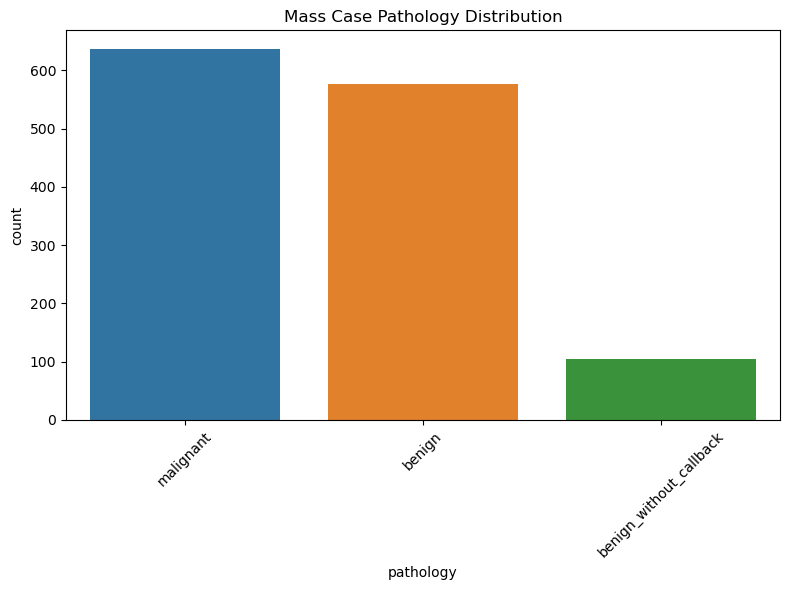

In [72]:
plt.figure(figsize=(8,6))
sns.barplot(x = train_mass['pathology'].value_counts().index.str.lower(), y = train_mass['pathology'].value_counts())
plt.xticks(rotation =45)
plt.title("Mass Case Pathology Distribution")
plt.tight_layout()
plt.savefig('./Presentation/Figures/Mass Case Pathology Distribution.jpg', dpi = 200);

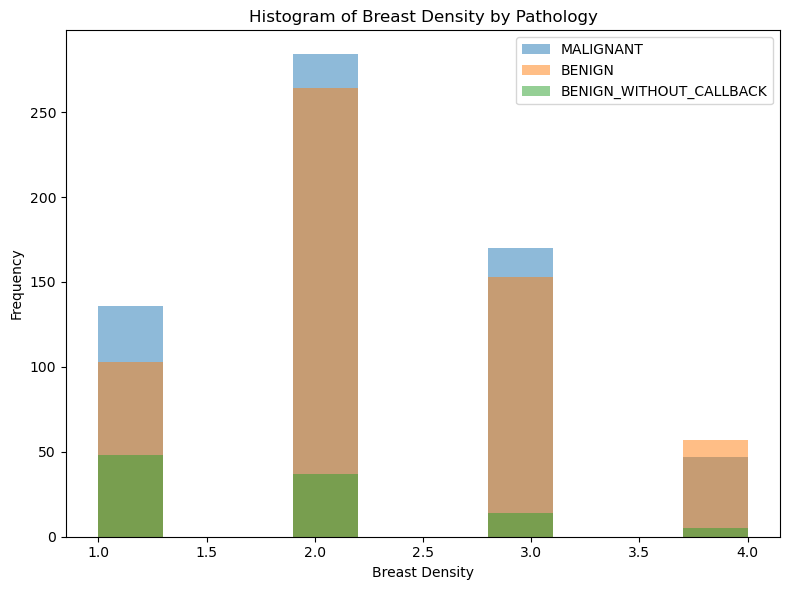

In [56]:
plt.figure(figsize=(8,6))
for pathology_group in train_mass['pathology'].unique():
    plt.hist(train_mass[train_mass['pathology'] == pathology_group]['breast_density'], label=pathology_group, alpha=0.5)
plt.xlabel('Breast Density')
plt.ylabel('Frequency')
plt.title('Histogram of Breast Density by Pathology')
plt.legend()
plt.tight_layout()
plt.savefig('./Presentation/Figures/Mass Case Breast Density with Pathology.jpg', dpi = 200);

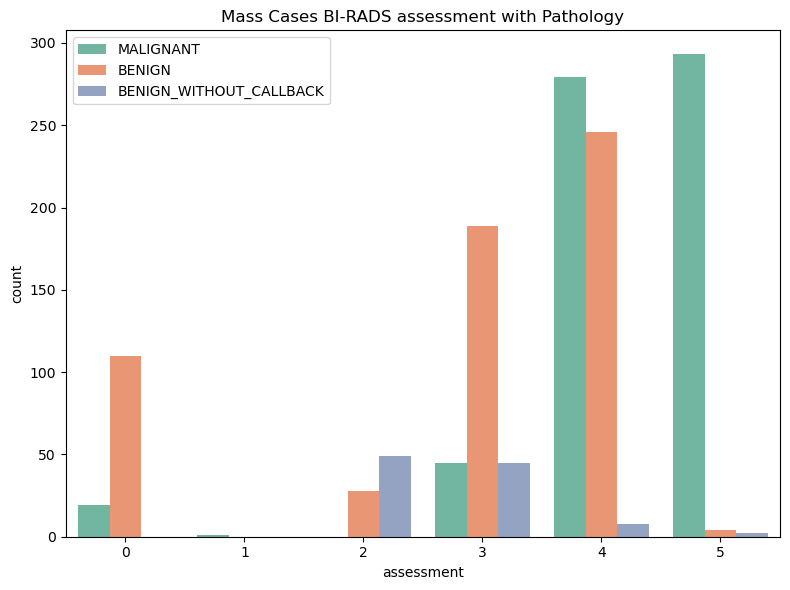

In [74]:
plt.figure(figsize = (8,6))
color_pal = sns.color_palette("Set2",n_colors=train_mass['assessment'].nunique())
sns.countplot(x=train_mass['assessment'],hue = train_mass['pathology'],palette=  color_pal)
plt.title("Mass Cases BI-RADS assessment with Pathology")
plt.legend(loc = 'upper left')
plt.tight_layout()
plt.savefig('./Presentation/Figures/Mass Case BIRADS assessment with Pathology.jpg', dpi = 200);

In [49]:
train_mass['mass_shape'].value_counts()

mass_shape
IRREGULAR                                   351
OVAL                                        323
LOBULATED                                   305
ROUND                                       123
ARCHITECTURAL_DISTORTION                     80
IRREGULAR-ARCHITECTURAL_DISTORTION           47
LYMPH_NODE                                   26
ASYMMETRIC_BREAST_TISSUE                     20
FOCAL_ASYMMETRIC_DENSITY                     19
OVAL-LYMPH_NODE                               6
LOBULATED-IRREGULAR                           5
ROUND-OVAL                                    3
LOBULATED-LYMPH_NODE                          3
IRREGULAR-FOCAL_ASYMMETRIC_DENSITY            2
LOBULATED-ARCHITECTURAL_DISTORTION            2
LOBULATED-OVAL                                1
ROUND-IRREGULAR-ARCHITECTURAL_DISTORTION      1
ROUND-LOBULATED                               1
Name: count, dtype: int64

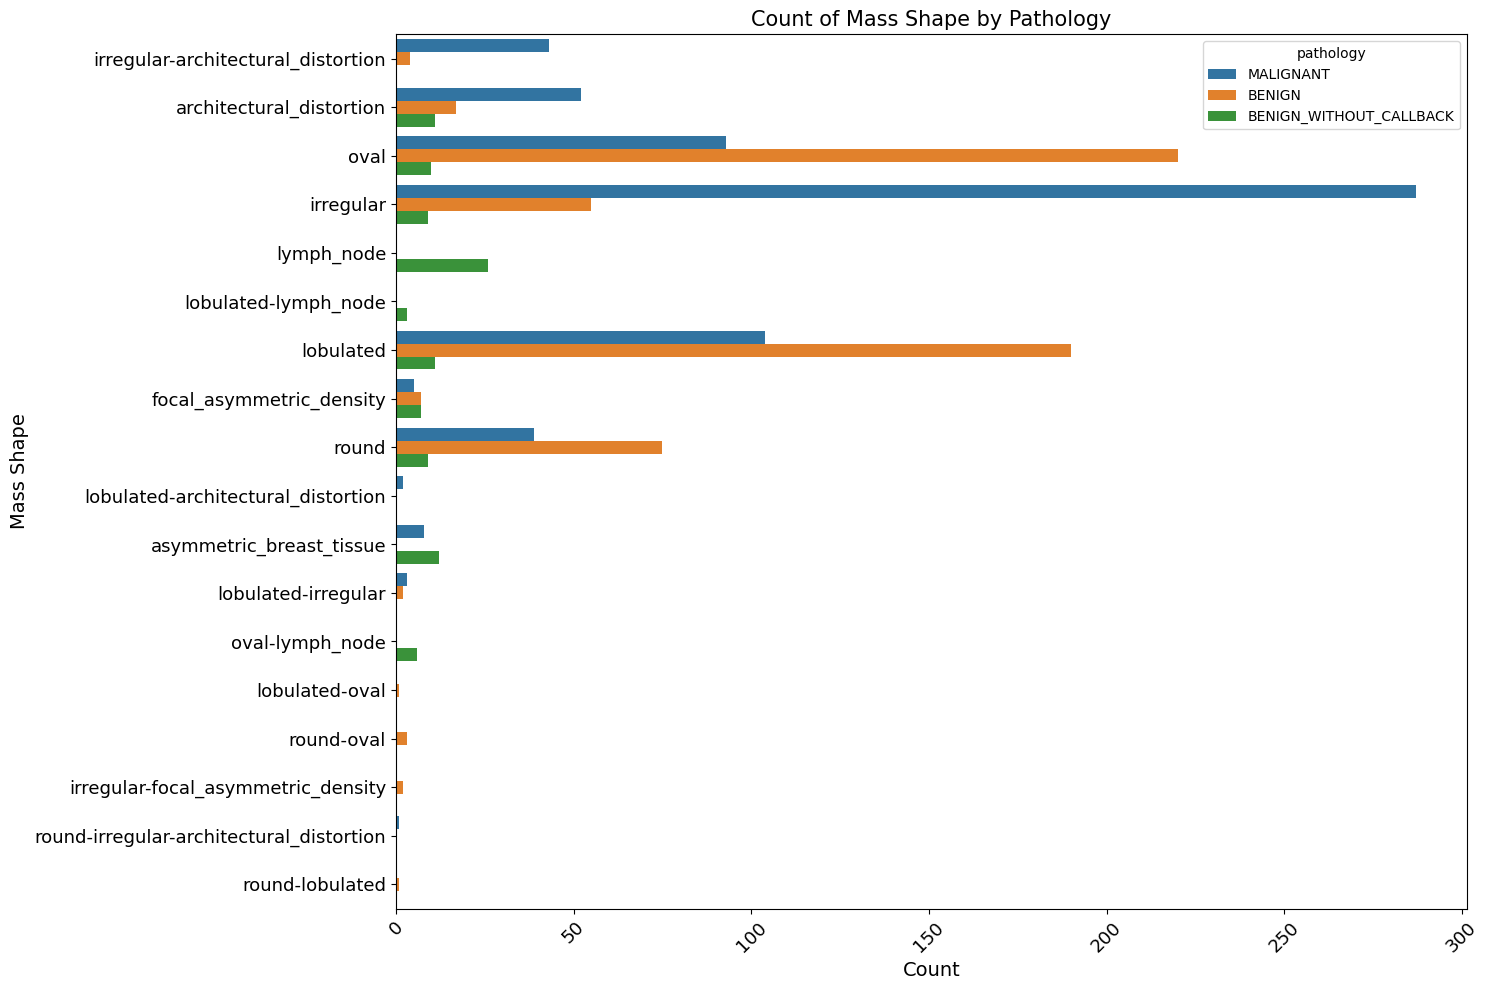

In [78]:
plt.figure(figsize=(15, 10))
# count_ms_paly = train_mass.groupby(['mass_shape','pathology']).size().reset_index(name = 'count')
sns.countplot(y=train_mass['mass_shape'].str.lower(), hue=train_mass['pathology'])
# sns.barplot(data = count_ms_paly, x = 'mass_shape', y='count',hue = 'pathology' )
# sns.catplot(data=count_ms_paly, y='mass_shape', x='count', hue='pathology', kind='bar', height=6, aspect=2)


plt.xlabel('Count',size = 14)
plt.xticks(rotation=45, fontsize =13)
plt.ylabel('Mass Shape',size = 14)
plt.yticks(fontsize =13)
plt.title('Count of Mass Shape by Pathology',size =15)


plt.tight_layout()
plt.savefig('./Presentation/Figures/Mass Case Mass Shape with Pathology.jpg', dpi = 200);


In [51]:
train_calc.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1544 entries, 0 to 1545
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   patient_id               1544 non-null   object
 1   breast_density           1544 non-null   int64 
 2   left_or_right_breast     1544 non-null   object
 3   image_view               1544 non-null   object
 4   abnormality_id           1544 non-null   int64 
 5   abnormality_type         1544 non-null   object
 6   calc_type                1544 non-null   object
 7   calc_distribution        1544 non-null   object
 8   assessment               1544 non-null   int64 
 9   pathology                1544 non-null   object
 10  subtlety                 1544 non-null   int64 
 11  image_file_path          1544 non-null   object
 12  cropped_image_file_path  1544 non-null   object
 13  ROI_mask_file_path       1544 non-null   object
dtypes: int64(4), object(10)
memory usage: 180.9+ 

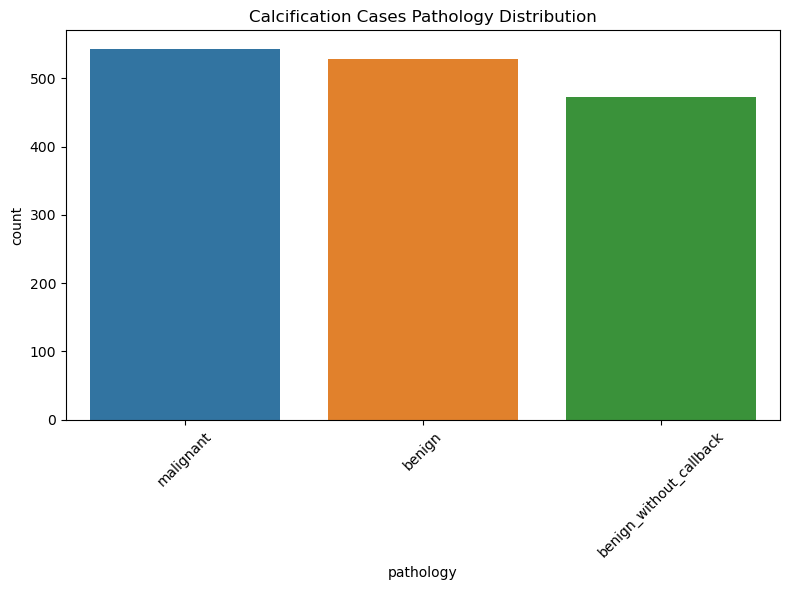

In [75]:
plt.figure(figsize=(8,6))
sns.barplot(x = train_calc['pathology'].value_counts().index.str.lower(), y = train_calc['pathology'].value_counts())
plt.xticks(rotation =45)
plt.title("Calcification Cases Pathology Distribution")
plt.tight_layout()
plt.savefig('./Presentation/Figures/Calcification Cases Pathology Distribution.jpg', dpi = 200);

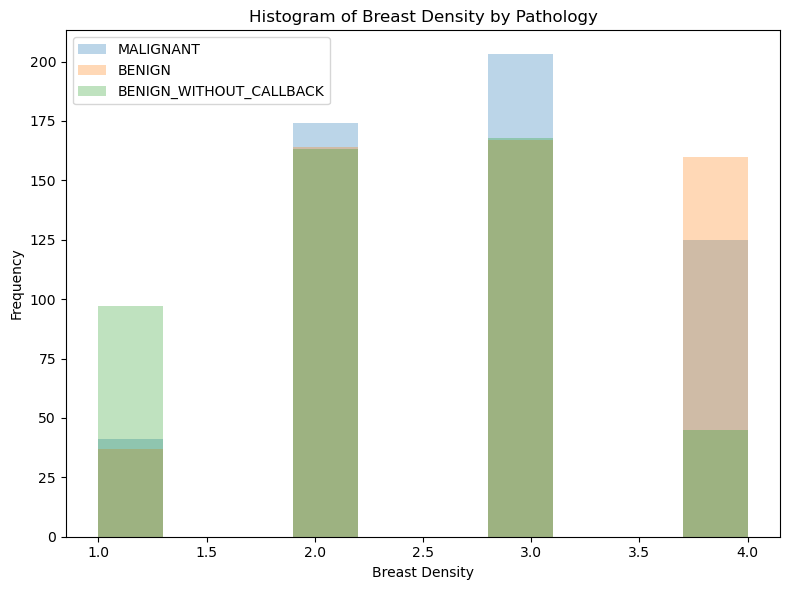

In [62]:
plt.figure(figsize=(8,6))
for pathology_group in train_calc['pathology'].unique():
    plt.hist(train_calc[train_calc['pathology'] == pathology_group]['breast_density'], label=pathology_group, alpha=0.3)
plt.xlabel('Breast Density')
plt.ylabel('Frequency')
plt.title('Histogram of Breast Density by Pathology')
plt.legend()
plt.tight_layout()
plt.savefig('./Presentation/Figures/Calcification Cases Breast Density with Pathology.jpg', dpi = 200);

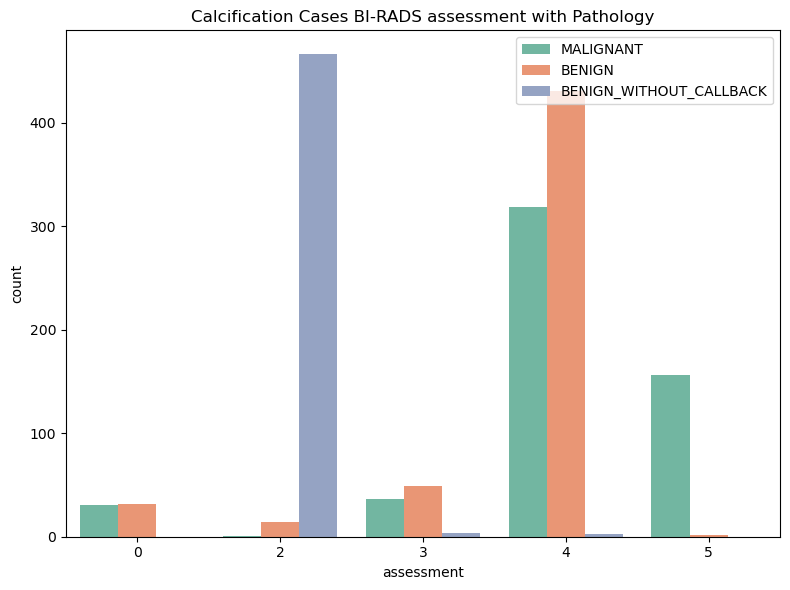

In [76]:
plt.figure(figsize = (8,6))
color_pal = sns.color_palette("Set2",n_colors=train_calc['assessment'].nunique())
sns.countplot(x=train_calc['assessment'],hue = train_calc['pathology'],palette=  color_pal)
plt.legend(loc = 'best')
plt.title("Calcification Cases BI-RADS assessment with Pathology")
plt.tight_layout()
plt.savefig('./Presentation/Figures/Calcification Cases BIRADS assessment with Pathology.jpg', dpi = 200);

In [54]:
train_calc['calc_type'].str.lower().value_counts()

calc_type
pleomorphic                                                 663
amorphous                                                   139
punctate                                                    106
lucent_center                                                93
vascular                                                     82
fine_linear_branching                                        77
coarse                                                       35
round_and_regular-lucent_center                              33
pleomorphic-fine_linear_branching                            28
round_and_regular-lucent_center-punctate                     24
round_and_regular-eggshell                                   23
punctate-pleomorphic                                         21
dystrophic                                                   20
lucent_centered                                              18
round_and_regular-lucent_center-dystrophic                   18
round_and_regular             

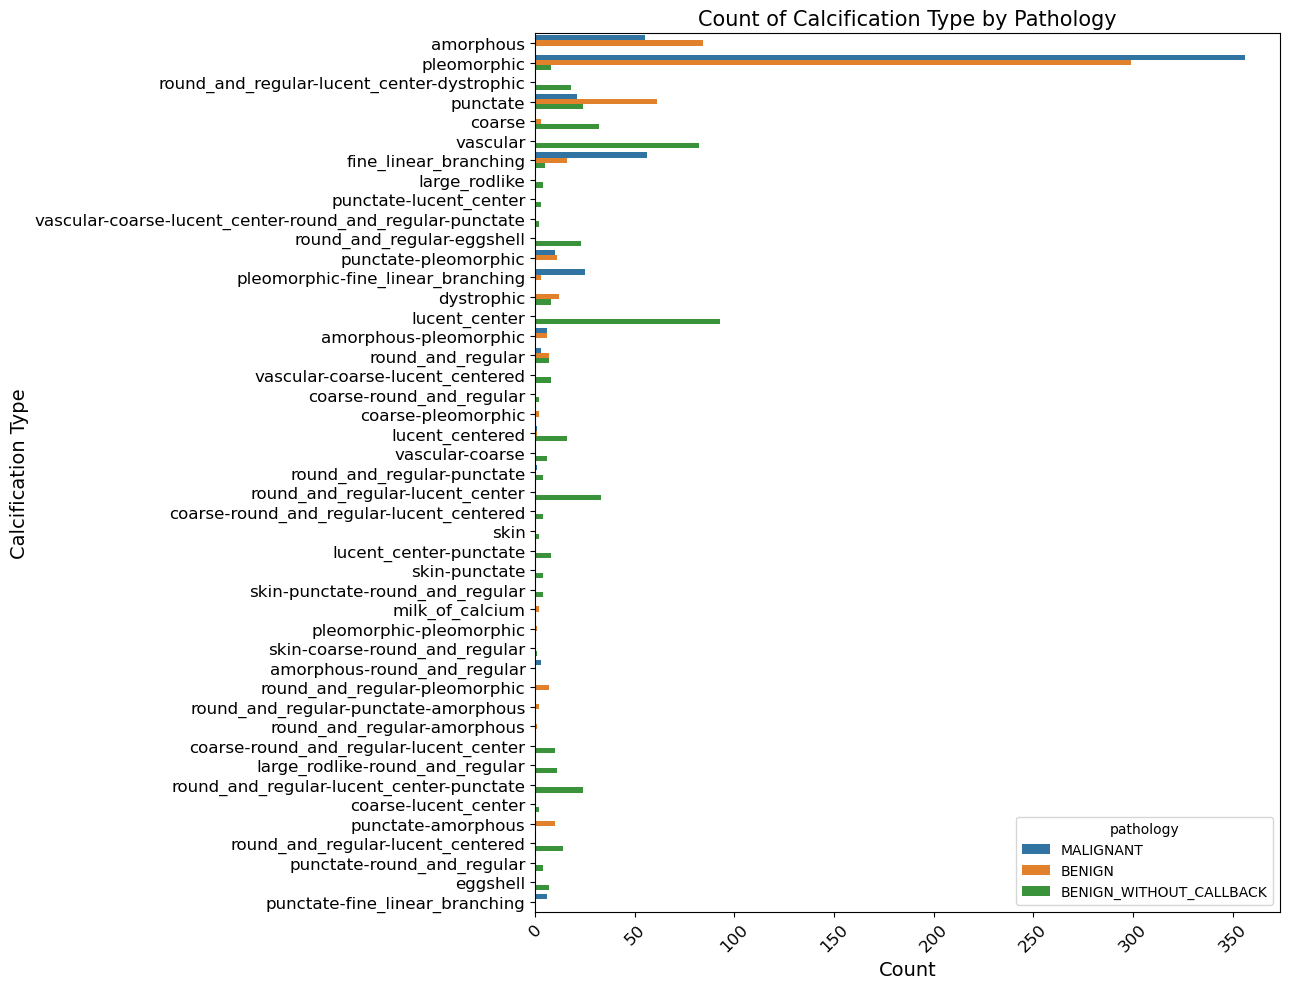

In [79]:
plt.figure(figsize=(13, 10))
sns.countplot(y=train_calc['calc_type'].str.lower(), hue=train_calc['pathology'])
plt.xlabel('Count',size = 14)
plt.xticks(rotation=45, fontsize =12)
plt.ylabel('Calcification Type',size = 14)
plt.yticks(fontsize =12)
plt.title('Count of Calcification Type by Pathology',size =15)

plt.tight_layout()
plt.savefig('./Presentation/Figures/Calcification Cases Calcification Type with Pathology.jpg', dpi = 200);

## Save cleaned CSV

In [70]:
train_mass.to_csv('./Data/Cleaned csv/Mass train cleaned.csv', index=False)  

In [71]:
train_calc.to_csv('./Data/Cleaned csv/Calc train cleaned.csv', index=False)  